In [1]:
import pandas as pd
from math import sqrt
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# read input
df = pd.read_csv('opsd_austria_daily.csv')

df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month


In [2]:
from sklearn.model_selection import GridSearchCV

In [3]:
# data imputation
def clean(dataset, columns):
    dataset[columns].replace(0, np.nan, inplace=True)
    dataset[columns].fillna(method='ffill', inplace=True) # choose a scheme for fillna
# call a clean function here for Electricity_consumption, Wind_production columns
clean(df,'Wind_production')
clean(df,'Electricity_consumption')


In [4]:
# ensemble learning for regression
def ensemble_training(df_train, df_test,depth, estimators):
    label = 'Electricity_consumption'
    X_train = df_train.drop(label, axis=1)
    y_train = df_train.loc[:,label]
    X_test = df_test.drop(label, axis=1)
    y_test = df_test.loc[:,label]
 

    
    dtrab = AdaBoostRegressor(DecisionTreeRegressor(max_depth=depth),
                              # check which value for max_depth gives better RMSE/MSE: 5, 10, 15, 20, 25
                              n_estimators=estimators,
                              # check which value for n_estimators gives better RMSE/MAE: 10, 20, 30, 40, 50, 100
                              random_state=1)
    dtrab.fit(X_train, y_train)
    y_predict=dtrab.predict(X_test)
    print('i=',depth)
    print('j=',estimators)
    print('RMSE: %.6f' %(sqrt(mean_squared_error(y_test, y_predict))))
    print('MAE: %.6f' %(mean_absolute_error(y_test, y_predict)))
    df_sol=pd.DataFrame({'True': np.array(y_test),'Predicted': np.array(y_predict)})
    return dtrab, df_sol


In [5]:
df.tail()

,Date,Electricity_consumption,Wind_production,Solar_production,Price,Wind+Solar,Year,Month
2095,2020-09-26,140.644,49.182,1.593,NaN,50.775,2020,9
2096,2020-09-27,130.375,12.691,2.909,NaN,15.600,2020,9
2097,2020-09-28,167.944,18.185,0.685,NaN,18.870,2020,9
2098,2020-09-29,166.983,29.281,2.091,NaN,31.372,2020,9
2099,2020-09-30,166.657,47.345,NaN,NaN,NaN,2020,9


In [6]:
features = ['Electricity_consumption','Wind_production','Month']
df_train = df.loc[df['Year']!=2019, features]
df_test = df.loc[df['Year']==2019, features]


In [7]:
df_train.tail()

,Electricity_consumption,Wind_production,Month
2095,140.644,49.182,9
2096,130.375,12.691,9
2097,167.944,18.185,9
2098,166.983,29.281,9
2099,166.657,47.345,9


In [8]:
def month_select(df, column):
    df_dummy = pd.get_dummies(df[column], prefix='M')
    df_new = pd.concat([df, df_dummy], axis=1)
    df_new = df_new.drop(column, axis=1)
    return df_new

In [9]:
df_train = month_select(df_train, 'Month')
df_test = month_select(df_test, 'Month')

df_sol = []
model, df_sol = ensemble_training(df_train, df_test,10,30)
df_sol = pd.concat([df_sol.reset_index(drop=True),
                  pd.Series(df.loc[df['Year']==2019,'Date']).reset_index(drop=True)], axis=1)

i= 10
j= 30
RMSE: 19.787122
MAE: 17.198861


In [10]:
clf.get_params().keys()

NameError: name 'clf' is not defined

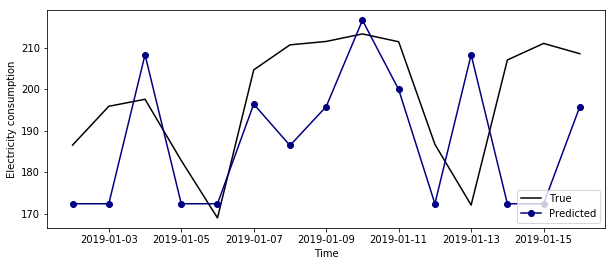

In [11]:

# visualization
fig,ax = plt.subplots(figsize=(10,4))
ax.plot_date(df_sol.loc[1:15,'Date'],
             df_sol.loc[1:15,'True'],
             marker='None',
             linestyle = '-',
             color='black', label='True')
ax.plot_date(df_sol.loc[1:15,'Date'],
             df_sol.loc[1:15,'Predicted'],
             marker='o',
             linestyle = '-',
             color='navy', markeredgecolor='navy', label='Predicted')
ax.set_xlabel('Time')
ax.set_ylabel('Electricity consumption')
ax.legend(loc='lower right')
plt.show()


Как видно из GridSearch ниже, лучшее значение достигается при глубине=5, n_estimators=10

In [ ]:
X_train = df_train.drop('Electricity_consumption', axis=1)
y_train = df_train.loc[:,'Electricity_consumption']

DTC=DecisionTreeRegressor()
clf=AdaBoostRegressor(base_estimator = DTC)
parametrs={
            'base_estimator__max_depth':np.array([5,10,15,20,25]),
       'n_estimators':np.array([10,20,30,40,50,100])}

grid=GridSearchCV(clf,parametrs).fit(X_train, y_train)



print(grid.best_params_)

In [336]:


df_sol = []
model, df_sol = ensemble_training(df_train, df_test,5,10)
df_sol = pd.concat([df_sol.reset_index(drop=True),
                  pd.Series(df.loc[df['Year']==2019,'Date']).reset_index(drop=True)], axis=1)

i= 5
j= 10
RMSE: 18.837921
MAE: 17.022593


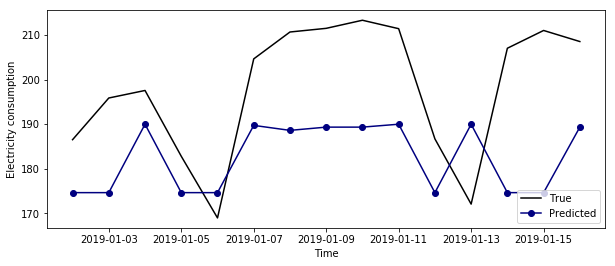

In [337]:
# visualization
fig,ax = plt.subplots(figsize=(10,4))
ax.plot_date(df_sol.loc[1:15,'Date'],
             df_sol.loc[1:15,'True'],
             marker='None',
             linestyle = '-',
             color='black', label='True')
ax.plot_date(df_sol.loc[1:15,'Date'],
             df_sol.loc[1:15,'Predicted'],
             marker='o',
             linestyle = '-',
             color='navy', markeredgecolor='navy', label='Predicted')
ax.set_xlabel('Time')
ax.set_ylabel('Electricity consumption')
ax.legend(loc='lower right')
plt.show()
